In [18]:
%load_ext autoreload
%autoreload 2

import os, sys
import argparse, cv2, logging, pdb
import matplotlib.pyplot as plt, numpy as np
import focus_stacking.registration.ecc as ecc
import focus_stacking.utils.images as im_utils
import focus_stacking.utils.data_loader as data_loader
from focus_stacking.utils.pyramids import StackPyramid, Pyramid
import focus_stacking.utils.pyramids
import focus_stacking.energy.energy as energies
import focus_stacking.fusion.fusion as fusion

align_max_iters = 50
align_eps = 1e-3
DATA_ROOT = '/n/fs/3d-indoor/macro_data/focus_stacks'

logger = logging.getLogger(__name__)

import os, subprocess, sys
import argparse, glob
import focus_stacking.methods.focus_stacking.focus_stack.pyramid as stk


IMGS_PATH = '/n/fs/3d-indoor/macro_data/focus_stacks/snail/000/f4.0/images'
RESULTS_PATH = '/n/fs/3d-indoorr/macro_data/focus_stacks/snail/000/f4.0/results'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
aux_out_dir = '/n/fs/3d-indoor/tmp_outdir/aux/'
registered_images = data_loader.load_images_from_dir(aux_out_dir, match='reg_*.jpg')
images = np.stack(registered_images)

In [34]:
min_size = 256
smallest_side = min(images[0].shape[:2])
depth = int(np.log2(smallest_side / min_size))
kernel_size = 5
pyramids = stk.laplacian_pyramid(images, depth)

gaussian
5
(9, 4640, 6960, 3)
pyramid
5
(9, 290, 435, 3)


In [37]:
fused_base = stk.get_fused_base(pyramids[-1], kernel_size)

get_fused_base0
get_fused_base1
get_fused_base2
get_fused_base3
get_fused_base4
get_fused_base5
get_fused_base6
get_fused_base7
get_fused_base8


In [39]:
result = im_utils.bgr_to_rgb(cv2.convertScaleAbs(fused_base))
plt.imsave('old_base.png', result)

In [74]:
fusion = stk.fuse_pyramids(pyramids, kernel_size)
fused_im = stk.collapse(fusion)
result = im_utils.bgr_to_rgb(cv2.convertScaleAbs(fused_im))

get_fused_base0
get_fused_base1
get_fused_base2
get_fused_base3
get_fused_base4
get_fused_base5
get_fused_base6
get_fused_base7
get_fused_base8
3
2
1
0


In [75]:
fused_im

array([[[  10.80768407,   18.61588516,   10.47582592],
        [  11.9143812 ,   19.31734617,   11.97194408],
        [  10.05023637,   16.78728908,   10.47607552],
        ...,
        [ -45.6744177 , -106.22712558,  -63.75913207],
        [ -48.68792575, -107.22696143,  -63.76836219],
        [ -48.69130277, -107.22692039,  -63.77066971]],

       [[  12.88569231,   20.85888428,   12.28404379],
        [  10.76173864,   17.97024065,   11.1954865 ],
        [  10.06225688,   16.82603709,   10.49931553],
        ...,
        [ -45.6984274 , -106.24542278,  -63.76647209],
        [ -48.71202449, -107.24549429,  -63.77577729],
        [ -48.71542376, -107.24551217,  -63.77810359]],

       [[  13.12942291,   20.36049125,   14.12299738],
        [  10.78188288,   18.04065568,   11.23683871],
        [  10.08765889,   16.90409709,   10.54596424],
        ...,
        [ -45.74546594, -106.28181412,  -63.78064513],
        [ -48.75923769, -107.28234991,  -63.79009918],
        [ -48.76268062

In [41]:
plt.imsave('fused_old.png', result)

In [59]:
lap = im_utils.bgr_to_rgb(fusion[3])

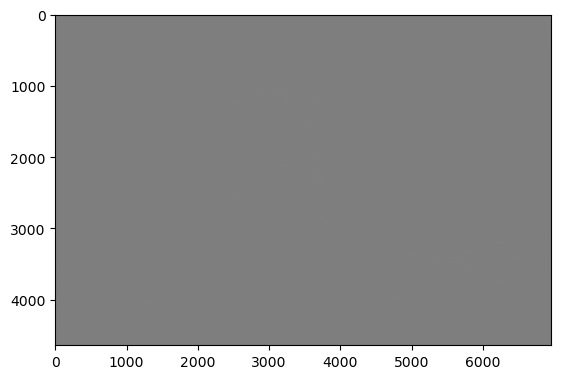

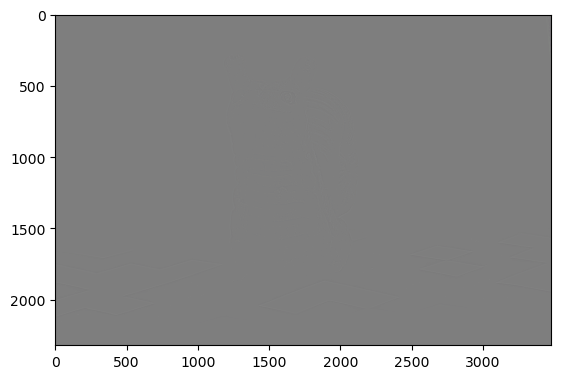

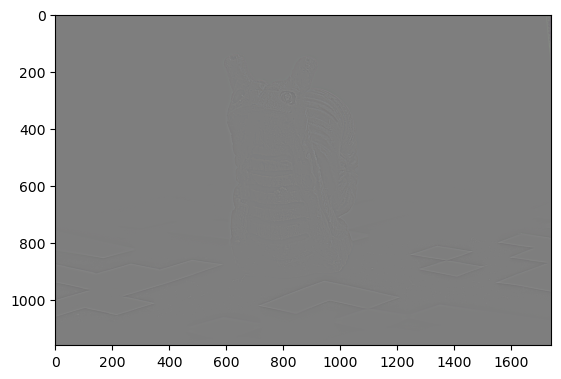

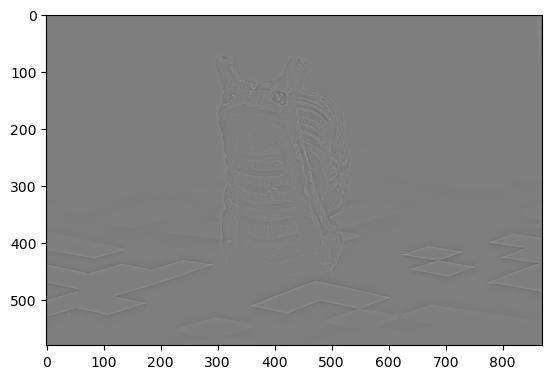

In [61]:
for l in range(4):
    lap = im_utils.bgr_to_rgb(fusion[l])
    plt.imshow(im_utils.normalize_with_neg(lap)/255)
    plt.show()

In [56]:
len(fusion)

5

In [53]:
lap

array([[[ 5.64597790e-01, -4.65676648e-01,  2.67776898e-01],
        [ 5.36266268e-01,  6.40617201e-02,  1.76612334e-01],
        [ 2.81533549e-01,  1.07537266e-01,  1.60557121e-01],
        ...,
        [-1.70401326e-01,  5.22500774e-01,  8.32858899e-02],
        [-6.87124750e-01,  2.55128623e-01,  3.18510251e-01],
        [ 5.13909941e-01,  2.22178226e-01, -1.78689237e-01]],

       [[ 1.78004584e-01, -4.21905158e-01,  9.93877209e-02],
        [-3.19413418e-01, -4.78530918e-02, -1.49656969e-01],
        [-3.76064414e-01,  1.56797864e-01, -8.35984716e-02],
        ...,
        [-1.75638084e-01, -1.00682850e-01, -2.51097850e-01],
        [-2.76302373e-02,  4.90488077e-02,  5.07692872e-02],
        [ 3.34640127e-01, -1.98568756e-02, -1.05141401e-01]],

       [[-8.55925871e-02,  7.56517155e-02,  1.96476781e-01],
        [-4.56533662e-01,  3.75023437e-02,  3.23155555e-02],
        [-2.94836730e-01,  8.79926298e-02, -3.15186964e-02],
        ...,
        [-5.30403211e-01, -2.79650066e-01,

In [64]:
fusion[4].shape

(290, 435, 3)

In [70]:
from focus_stacking.utils.pyramids import LaplacianPyramid
kernel = np.array([.25-.4/2, .25, .4, .25, .25-.4/2])
reconstruction_layers = [{'laplacian': fused_layer} for fused_layer in fusion]
reconstruction_pyramid = LaplacianPyramid(levels=reconstruction_layers, kernel=kernel)

In [71]:
fused_im = reconstruction_pyramid.reconstruct()
result = np.clip(im_utils.bgr_to_rgb(fused_im) / 255, 0, 1)

In [73]:
plt.imsave('old_layers_my_fusion.png', result)